In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=1, noise=15, bias=10, random_state=1)

In [10]:
class CustomLinearReg:
    def __init__(self, lr=.01, iters=100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.coef_ = np.random.randn(X.shape[1], 1)
        self.bias_ = np.random.random()
        
        errors = []
        for i in range(self.iters):
            error =  self.gradient_decend(X, y)
            errors.append(error)
            
        return errors
    
    def gradient_decend(self, X, y):
        delta_coef, delta_bias, error = self.gradient(X, y)
        self.coef_ += delta_coef
        self.bias_ += delta_bias
        return error
    
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)   # reshape of y because actual y shape is (100,) which needed to be convert over (100, 1)
        yh = self.hypo(X)
        dmsedm = np.dot(X.T,(yh-ya))/len(X)
        dmsedm1 = np.mean(2*(yh-ya))
        delta_coef = -dmsedm*self.lr
        delta_bias = -dmsedm1*self.lr
        error = np.mean((yh-ya)**2)
        return delta_coef, delta_bias, error
        
    def hypo(self, X):
        return np.dot(X, self.coef_) + self.bias_
    
    def predict(self, X):
        return self.hypo(X).flatten()


In [11]:
model = CustomLinearReg(lr = 0.0008, iters=10000)
error = model.fit(X, y)

In [12]:
model.coef_, model.bias_

(array([[81.88417489]]), 13.056109766453968)

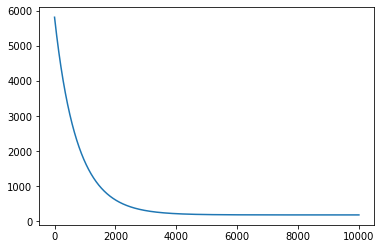

In [13]:
plt.figure()
plt.plot(error)
plt.show()

In [14]:
model.predict(X[:10])

array([ -37.0370594 ,   -7.36337767,   53.05801511,   75.45276652,
        137.50505576,   43.97260888,   55.05694489,  -41.90832581,
       -101.2948404 ,   38.90161699])

In [15]:
y[:10]

array([-43.9977391 ,  -3.0281917 ,  36.92519443, 101.19767617,
       148.91946935,  42.58496708,  45.11116131, -22.95938308,
       -92.90734094,  34.22106871])

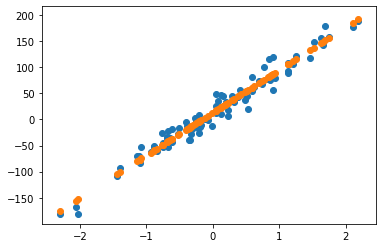

In [16]:
plt.scatter(X, y)
plt.scatter(X, model.predict(X))